In [3]:
# Run this cell to load the necessary helper functions
#
#

import sys
b= sys.path
# sys.path=['/home/jovyan/analysis'] + b
sys.path=['/Users/uclapic/Documents/code-development/git/JupyterPIC/analysis'] + b
import osiris
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from osh5vis import new_fig, osplot
from osh5io import *
import osh5io
import osh5vis
from osh5utils import fft
import glob
from ipywidgets import interact_manual,fixed,Layout,interact, FloatSlider
import ipywidgets as widgets
interact_calc=interact_manual.options(manual_name="Run Leap Frog Program")
import os
from osiris import tajima
from h5_utilities import *
from analysis import *
import matplotlib.colors as colors

/Users/uclapic/Documents/code-development/git/JupyterPIC/analysis/osh5def.py:417: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if axes is () or axes[0] is None:  # axes is none, numpy default is to reverse the order


In [4]:
def newton_ode(xv,t):
    # xv vector
    # xv[1] = x1
    # xv[2] = x2
    # xv[3] = x3
    def ex(xv,t):
        amp = 0.5
        k0=1
        w0=1
        return amp * np.sin(k0*xv[0]-w0*t)
    def ey(xv,t):
        return 0.0
    def ez(xv,t):
        return 0.0
    return [xv[3],xv[4],xv[5],ex(xv,t),ey(xv,t),ez(xv,t)]

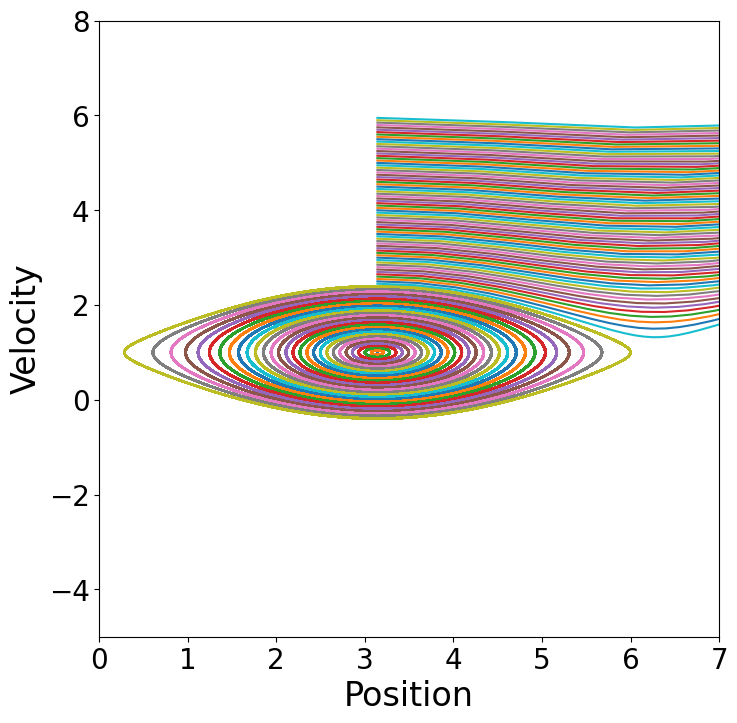

In [8]:
import scipy
import numpy as np
# plt.plot(orbit[:,0]-time,orbit[:,3])
NTIMES = 10000
NPARTS = 120
DT = 0.3
orbits=np.zeros((6,NPARTS))
orbits[0,:]= 3.1415926
for i in range(NPARTS):
    orbits[3,i] = 0.05 * i
time=np.arange(NTIMES)* DT
solutions=np.zeros((NPARTS,NTIMES,6))
for i in range(NPARTS):
    solutions[i,:,:]=scipy.integrate.odeint(newton_ode,orbits[:,i],time)
SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.figure(figsize=(8,8))
for i in range(NPARTS):
    plt.plot(solutions[i,:,0]-time,solutions[i,:,3])
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.xlim(0,7)
plt.ylim(-5,8)
plt.show()